In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters

# Get 25k training instances, 25k test (keeps 10k most frequent words)
# for each group, 50% positive and 50% negative
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data), len(test_data))

8982 2246


In [ ]:
# convert the first sample back into english
first_sample = train_data[0]
word_dict = reuters.get_word_index()
reverse_word_dict = {value: key for (key, value) in word_dict.items()}
print(' '.join([reverse_word_dict.get(i-3, '?') for i in first_sample]))

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [ ]:
# each sample has a label that is a number between 0 and 45, the label we need to predict
train_labels[0]

3

In [ ]:
# vectorize the input data and multi-hot encode it so that we have a 10k wide vector where each element has a 1 if that word is present
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

X_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
# one-hot encode the labels
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

y_train[0] # the label for the first sample is 3, so the third index will be 1

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_split=0.2)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.4061 - loss: 3.2544 - val_accuracy: 0.6066 - val_loss: 1.9975
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6329 - loss: 1.7967 - val_accuracy: 0.6689 - val_loss: 1.5313
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7065 - loss: 1.3704 - val_accuracy: 0.7001 - val_loss: 1.3374
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7505 - loss: 1.1366 - val_accuracy: 0.7362 - val_loss: 1.2451
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7960 - loss: 0.9751 - val_accuracy: 0.7451 - val_loss: 1.1647
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8194 - loss: 0.8497 - val_accuracy: 0.7629 - val_loss: 1.0856
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.8509 - loss: 0.7061 - val_accuracy: 0.7696 - val_loss: 1.0383
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.8751 - loss: 0.5909 - val_accuracy: 0.7852 - v

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

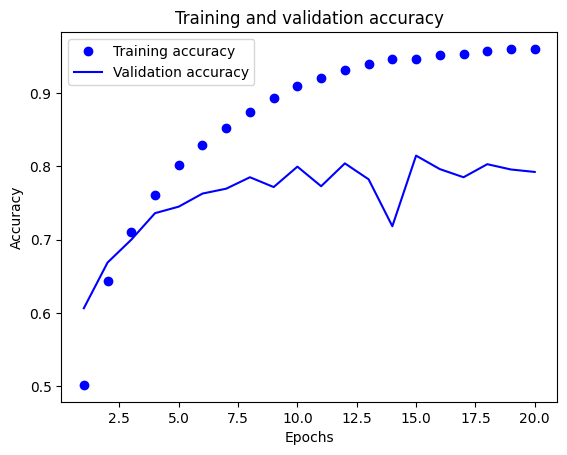

In [ ]:
# plot the training accuracy and validation accuracy vs epochs
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

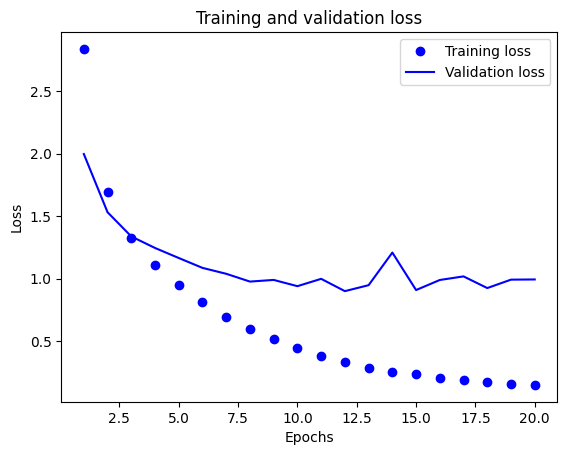

In [ ]:
# prompt: plot the loss

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# see how the model performs on unseen data
results = model.evaluate(X_test, y_test)
results

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7889 - loss: 1.0379


[1.0415986776351929, 0.7836152911186218]

In [ ]:
predictions = model.predict(X_test)

# print which index has the highest probability for sample 0
predicted_label = np.argmax(predictions[0])
actual_label = np.argmax(y_test[0])
print(predicted_label, actual_label) # correct! yipee

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
3 3
